# Ejemplo de Networkx


In [1]:
import pandas   as pd
import networkx as nx
import numpy    as np
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('prueba.csv', index_col=0)
df

,1,2,3,4
A,9,0,0,0
B,2,6,7,8
C,0,0,5,0
D,0,2,0,0
E,2,0,1,0
F,0,9,0,0
G,6,1,0,0
H,4,4,3,0


In [119]:
list(df.columns)

['1', '2', '3', '4']

In [121]:
G = nx.Graph()

funciones = list(df.index)
especies = list(df.columns)
G.add_nodes_from(funciones, bipartite=0)
G.add_nodes_from(especies, bipartite=1)

In [124]:
pesos = [('a','1', 9),
         ('b','1', 2), ('b','2',6), ('b','3',7), ('b','4',8),
         ('c','3', 5),
         ('d','2', 2),
         ('e','1', 2), ('e','3', 1),
         ('f','2', 9),
         ('g','1', 6), ('g','2',1),
         ('h','1', 4), ('h','2',4), ('h','3', 3)]

#leemos las aristas con pesos del dataframe
pesos = []
for i,linea in df.iterrows():
    nodo = linea.name
    l = list(linea)
    for j,val in enumerate(l):
        if(val>0):
            pesos.append((nodo, str(j+1), val))

#agregamos las aristas a G
G.add_weighted_edges_from( pesos ) 

#rescatamos los pesos en W de forma ordenadas
W = [x[2] for x in pesos]
print(W)

nodos = list(G.nodes)
#rescatamos los colores de cada nodo para colorearlo de yellow y red
C = ['yellow' if x in funciones else 'red' for x in nodos]
print(nodos)
print(C)
aristas = list(G.edges)



[9, 2, 6, 7, 8, 5, 2, 2, 1, 9, 6, 1, 4, 4, 3]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', '1', '2', '3', '4']
['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'red']


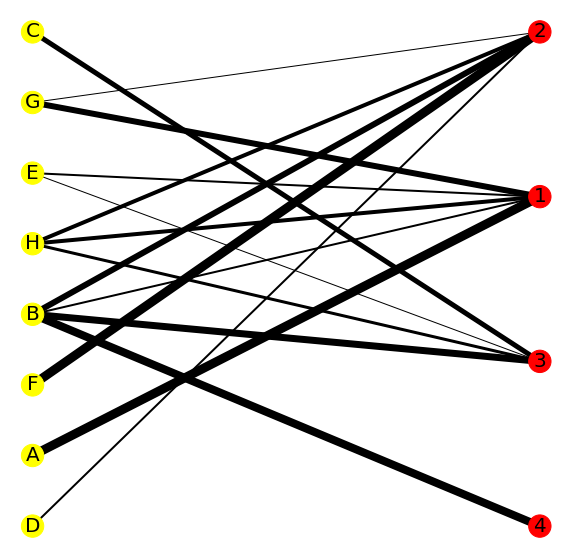

In [126]:
fig = plt.figure(figsize=(10,10))
pos=nx.bipartite_layout(G, funciones)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=C)
nx.draw_networkx_edges(G, pos, edgelist=aristas, width=W)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
plt.axis("off")
plt.show()